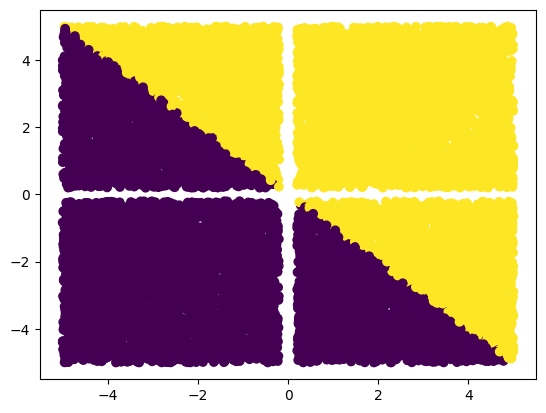

In [7]:
# create random point with two coordinates between -5 and 5 on both axis
import numpy as np

def create_points(n):
    # set seed for reproducibility
    np.random.seed(42)
    data = np.random.uniform(-5, 5, (n, 2))
    data = data[(((data[:, 0] > 0.2).astype(float) + (data[:, 0] < -0.2).astype(float)) * ((data[:, 1] > 0.2).astype(float) + (data[:, 1] < -0.2).astype(float))).astype(bool)]
    y = np.zeros(data.shape[0])
    # select the one above the line y = -x
    filter = data[:, 1] > -data[:, 0]
    y[filter] = 1
    return data, y

data, y = create_points(16000)
data_test, y_test = create_points(4000)
# visualise them
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=y)

In [8]:
# how to select the points between two lines y = 2x and y = 2x + 1
# y = 2x
# y = 2x + 1
def select_points(data, m, n):
    # check if m and n are both positive or both negative
    if (m > 0 and n < 0) or (m < 0 and n > 0):
        a = data[(data[:,1] > m*data[:,0]) & (data[:,1] > n*data[:,0])]
        b = data[(data[:,1] < n*data[:,0]) & (data[:,1] < m*data[:,0])]
    else:
        a = data[(data[:,1] > m*data[:,0]) & (data[:,1] < n*data[:,0])]
        b = data[(data[:,1] > n*data[:,0]) & (data[:,1] < m*data[:,0])]
    return np.concatenate((a, b))
exp = select_points(data, 2, 3)
exp_test = select_points(data_test, 2, 3)

In [9]:
# divide the space in n slices
def divide_space(data, n):
    client_dict = {}
    angle = 180/n
    angles = np.arange(0, 179, angle)
    # apply the same function to each element of the list
    m = np.tan(np.radians(angles))
    # select a random element in m
    np.random.seed(42)
    y_div = np.random.choice(m, 1, replace=False)
    for i in range(n-1):
        print(i, m[i], m[i+1])
        client_dict[i] = {}
        client_dict[i]['x'] = select_points(data, m[i], m[i+1])
        client_dict[i]['y'] = np.zeros(len(client_dict[i]['x']))
        filter = client_dict[i]['x'][:, 1] > y_div*client_dict[i]['x'][:, 0]
        client_dict[i]['y'][filter] = 1
    client_dict[n-1] = {}
    client_dict[n-1]['x'] = select_points(data,  m[n-1], m[0])
    client_dict[n-1]['y'] = np.zeros(len(client_dict[n-1]['x']))
    filter = client_dict[n-1]['x'][:, 1] > y_div*client_dict[n-1]['x'][:, 0]
    client_dict[n-1]['y'][filter] = 1
    return client_dict
data_dict = divide_space(data, 10)
data_dict_test = divide_space(data_test, 10)

0 0.0 0.3249196962329063
1 0.3249196962329063 0.7265425280053609
2 0.7265425280053609 1.3763819204711731
3 1.3763819204711731 3.077683537175253
4 3.077683537175253 1.633123935319537e+16
5 1.633123935319537e+16 -3.0776835371752544
6 -3.0776835371752544 -1.3763819204711738
7 -1.3763819204711738 -0.7265425280053611
8 -0.7265425280053611 -0.32491969623290645
0 0.0 0.3249196962329063
1 0.3249196962329063 0.7265425280053609
2 0.7265425280053609 1.3763819204711731
3 1.3763819204711731 3.077683537175253
4 3.077683537175253 1.633123935319537e+16
5 1.633123935319537e+16 -3.0776835371752544
6 -3.0776835371752544 -1.3763819204711738
7 -1.3763819204711738 -0.7265425280053611
8 -0.7265425280053611 -0.32491969623290645


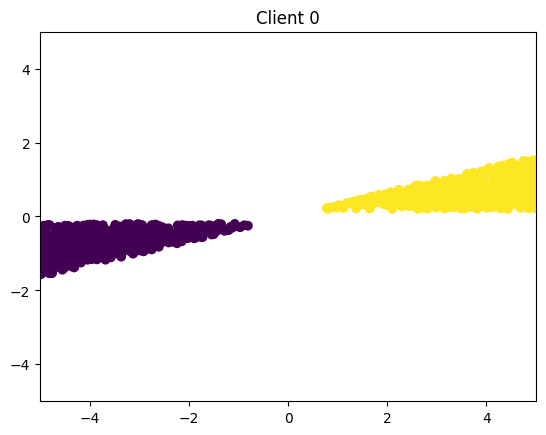

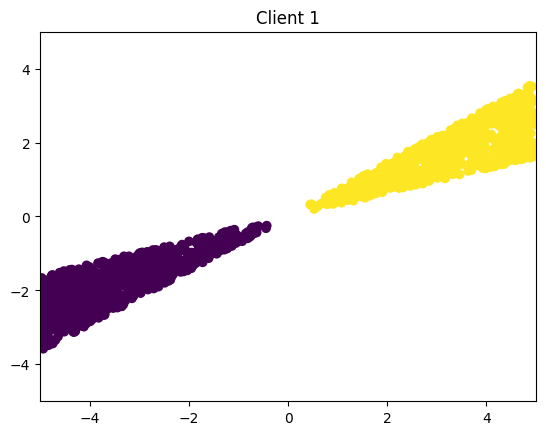

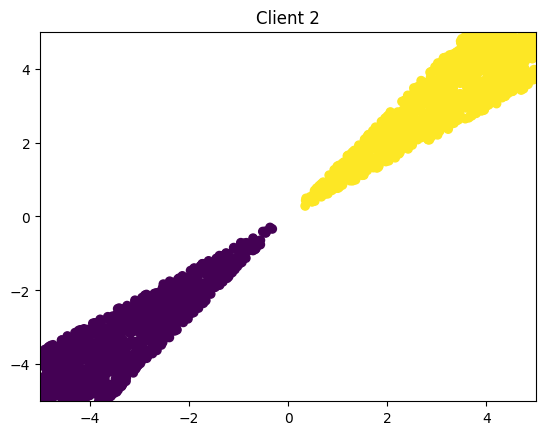

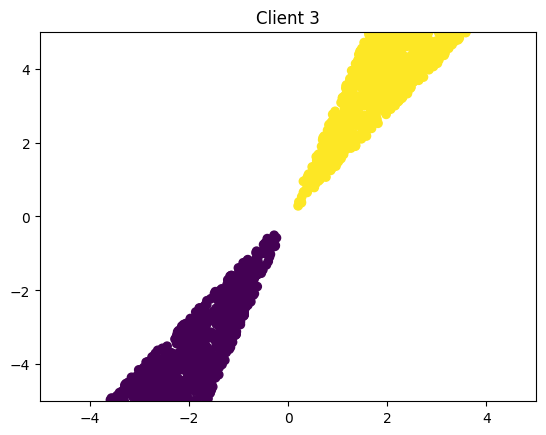

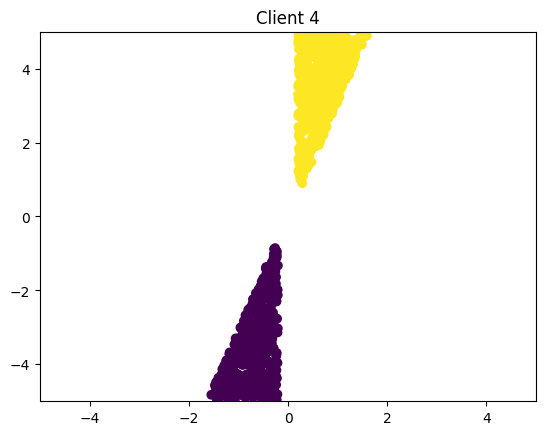

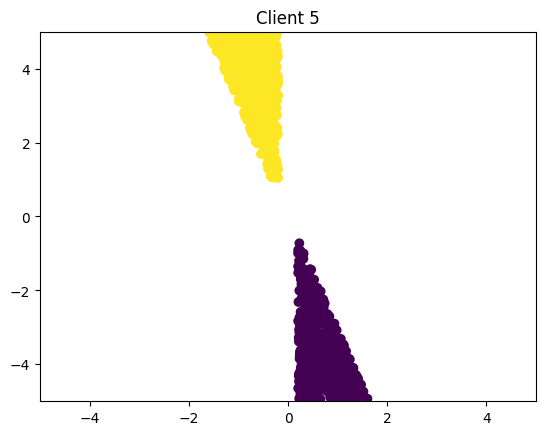

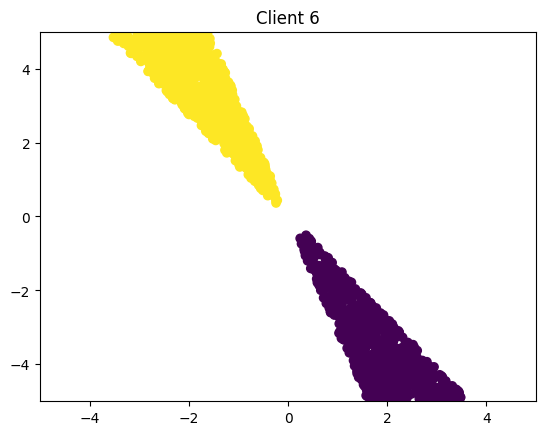

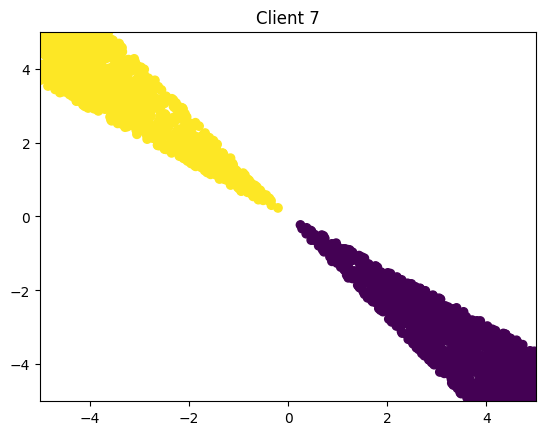

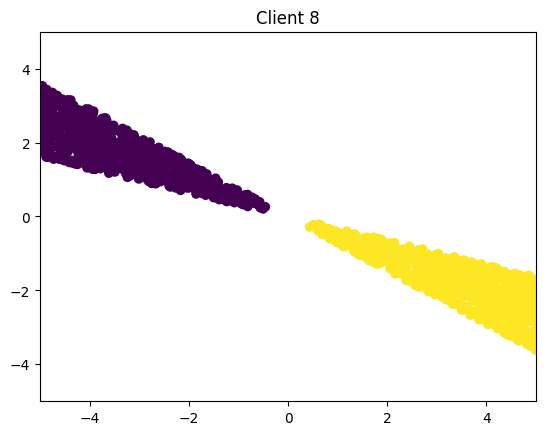

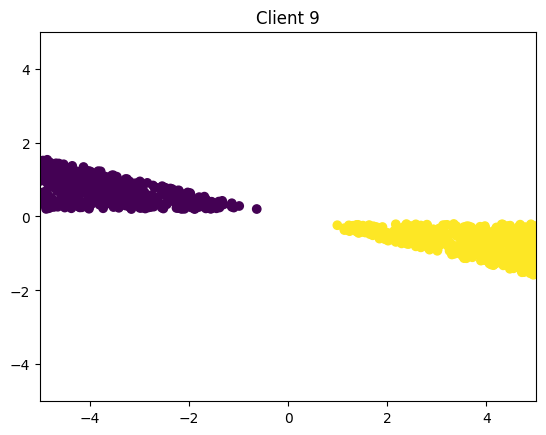

In [10]:
# visualise data dict with different colors
for key in data_dict:
    plt.scatter(data_dict[key]['x'][:, 0], data_dict[key]['x'][:, 1], c=data_dict[key]['y'])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.title('Client {}'.format(key))
    plt.show()

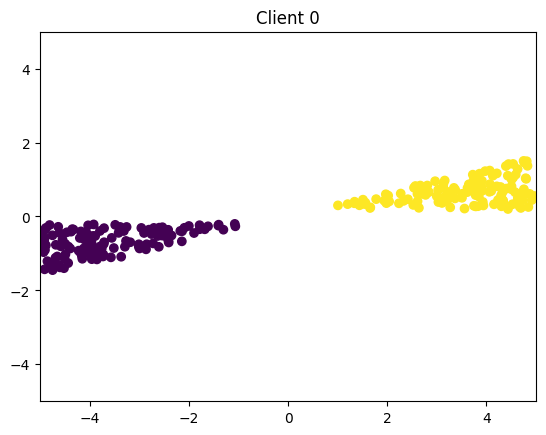

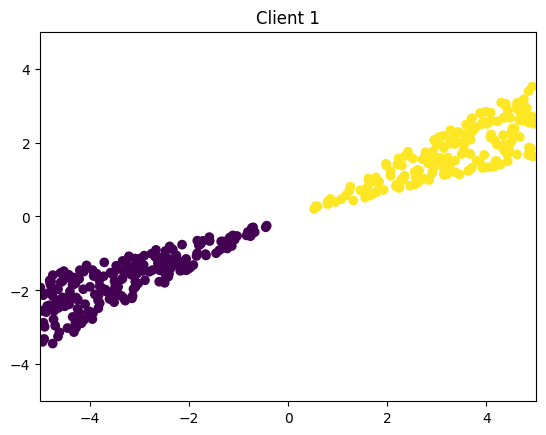

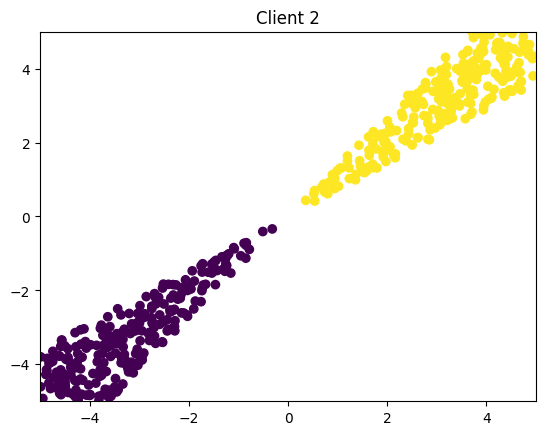

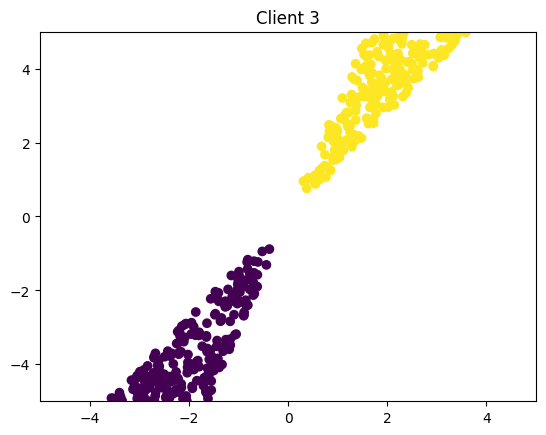

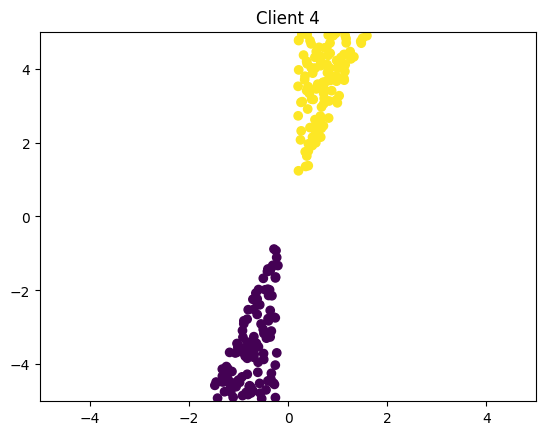

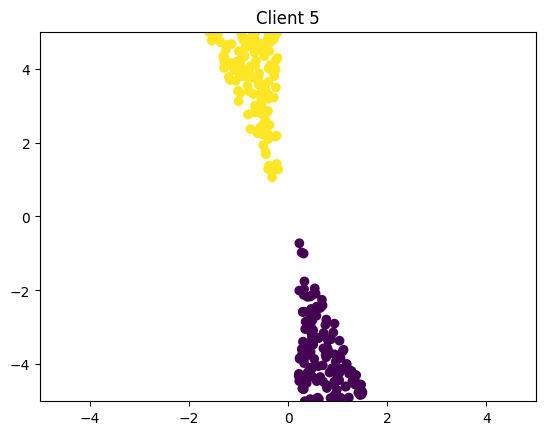

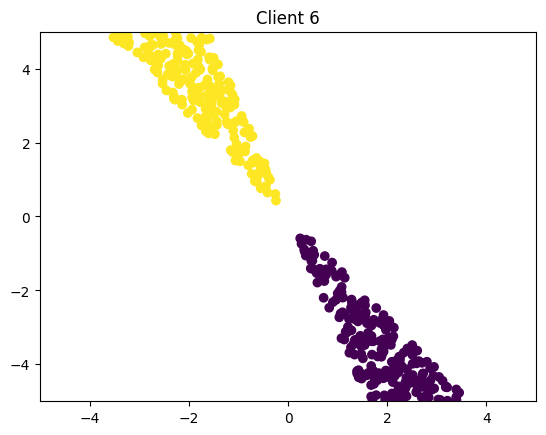

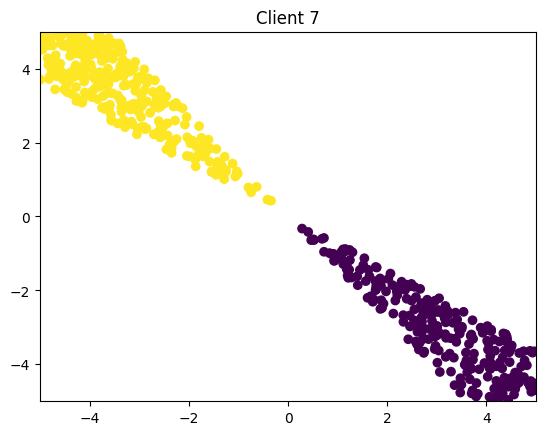

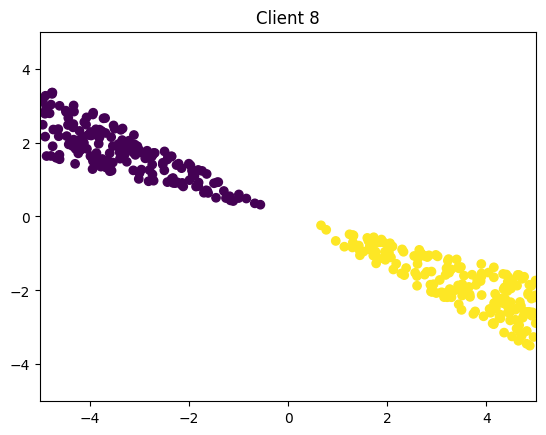

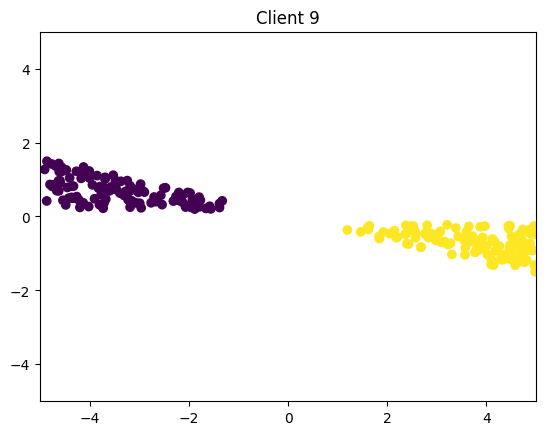

In [11]:
# visualise data dict test with different colors
for key in data_dict_test:
    plt.scatter(data_dict_test[key]['x'][:, 0], data_dict_test[key]['x'][:, 1], c=data_dict_test[key]['y'])
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.title('Client {}'.format(key))
    plt.show()

In [12]:
import pandas as pd
# combine x and y in a single dataframe
# and then save n npy file that contains the x and y for each client in the same file
for key in data_dict:
    df = np.concatenate((data_dict[key]['x'], data_dict[key]['y'].reshape(-1, 1)), axis=1)
    df = pd.DataFrame(df, columns=['x1', 'x2', 'Labels'])
    df.to_csv('./data/df_synthetic_random_{}.csv'.format(key+1), index=False)

In [14]:
# create a unique dataset for testing
df = np.concatenate((data_test, y_test.reshape(-1, 1)), axis=1)
df = pd.DataFrame(df, columns=['x1', 'x2', 'Labels'])
# save without index
df.to_csv('./data/df_synthetic_random_test.csv'.format(key), index=False)

# save single datasets for testing
for key in data_dict:
    df = np.concatenate((data_dict_test[key]['x'], data_dict_test[key]['y'].reshape(-1, 1)), axis=1)
    df = pd.DataFrame(df, columns=['x1', 'x2', 'Labels'])
    df.to_csv('./data/df_synthetic_random_test_{}.csv'.format(key+1), index=False)

In [ ]:
# load all fine in a folder starting with a name (npy file) and put them in a list
import os
import pandas as pd
import numpy as np
def load_data(path, start):
    data = []
    #ordered list of files in the directory
    files = []
    for file in os.listdir(path):
        if file.startswith(start):
            file_n = file.split('_')[-1].split('.')[0]
            files.append((file, int(file_n)))
    files.sort(key=lambda x: x[1])
    for file in files:
        print(file)
        df = np.load(os.path.join(path, file[0]))
        data.append(df)
    return data
data_changes = load_data('./results/net/synthetic/random', 'common_changes')
data_errors = load_data('./results/net/synthetic/random', 'errors')

('common_changes_1.npy', 1)
('common_changes_2.npy', 2)
('common_changes_3.npy', 3)
('common_changes_4.npy', 4)
('common_changes_5.npy', 5)
('common_changes_6.npy', 6)
('common_changes_7.npy', 7)
('common_changes_8.npy', 8)
('common_changes_9.npy', 9)
('common_changes_10.npy', 10)
('common_changes_11.npy', 11)
('common_changes_12.npy', 12)
('common_changes_13.npy', 13)
('common_changes_14.npy', 14)
('common_changes_15.npy', 15)
('common_changes_16.npy', 16)
('common_changes_17.npy', 17)
('common_changes_18.npy', 18)
('common_changes_19.npy', 19)
('common_changes_20.npy', 20)
('common_changes_21.npy', 21)
('common_changes_22.npy', 22)
('common_changes_23.npy', 23)
('common_changes_24.npy', 24)
('common_changes_25.npy', 25)
('common_changes_26.npy', 26)
('common_changes_27.npy', 27)
('common_changes_28.npy', 28)
('common_changes_29.npy', 29)
('common_changes_30.npy', 30)
('common_changes_31.npy', 31)
('common_changes_32.npy', 32)
('common_changes_33.npy', 33)
('common_changes_34.npy', 34

In [ ]:
#create a gif that shows the evolution of the plot (that contains the points inside each element of data)
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
def create_gif(data, path, name):
    images = []
    for i in range(len(data)):
        plt.scatter(data[i][:, 0], data[i][:, 1], c=list(range(len(data[i]))))
        # show legend in all plots
        plt.colorbar()
        plt.title('Iteration {}'.format(i))
        plt.xlabel('x1')
        plt.ylabel('x2')
        if name == 'error':
            lim = (-1, 1)
        else:
            lim = (-3, 3)
        plt.xlim(lim)
        plt.ylim(lim)
        plt.savefig(os.path.join(path, f'{name}/iteration_{i}.png'))
        plt.close()
    files = []
    for file in os.listdir(os.path.join(path, f'{name}')):
        file_n = file.split('_')[-1].split('.')[0]
        files.append((file, int(file_n)))
    files.sort(key=lambda x: x[1])
    for file in files:
        images.append(imageio.imread(os.path.join(path, f'{name}', file[0])))
    imageio.mimsave(os.path.join(path, f'evolution_{name}.gif'), images, duration=1)

create_gif(data_errors, './results/net/synthetic/random', 'error')
create_gif(data_changes, './results/net/synthetic/random', 'changes')

/var/folders/zy/8kppgl856s54352ptnhsp3zh0000gn/T/ipykernel_19386/578423691.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(os.path.join(path, f'{name}', file[0])))
